<a href="https://colab.research.google.com/github/ChebyrashkaARDM/ML2025/blob/main/AMI2_Chervyakov_ML25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke Prediction


11 клинических признаков, позволяющих прогнозировать инсульт.

Набор данных используется для прогнозирования вероятности инсульта у пациента на основе таких входных параметров, как пол, возраст, наличие различных заболеваний и статус курения.

На основе предоставленных данных нужно построить классификационную модель, которая будет предсказывать вероятность возникновения инсульта у человека.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv')
pd.set_option('display.max_columns', None)

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Размер таблицы. Каждая строка - пациент, каждый столбец - конкретный признак:


In [4]:
data.shape

(5110, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Обработаем пропущенные значения в таблице

In [10]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Пропущенные значения можно заполнить медианой, средним или модой. Также можно полностью избавиться от строк с пропущенными значениями.

Заполним пропущенные значения средним:

In [17]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


##Визуализация данных

Метод data.describe() используется для получения сводной статистики о числовых столбцах в DateFrame. Он возвращает такие показатели, как:
1. count - количество ненулевых значений
2. mean - среднее значение
3. std - стандартное отклонение
4. min - минимальное значение
5. 25% - нижний квартиль
6. 50% - медиана
7. 75% - верхний квартиль
8. max - максимальное значение

In [18]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Нормальные показатели уровня глюкозы в крови зависят от состояния человека и его возраста.

Новорожденные (до 1 месяца): 45–90 мг/дл

Дети от 1 месяца до 5 лет: 70–100 мг/дл

Дети старше 5 лет и взрослые: 70–100 мг/дл

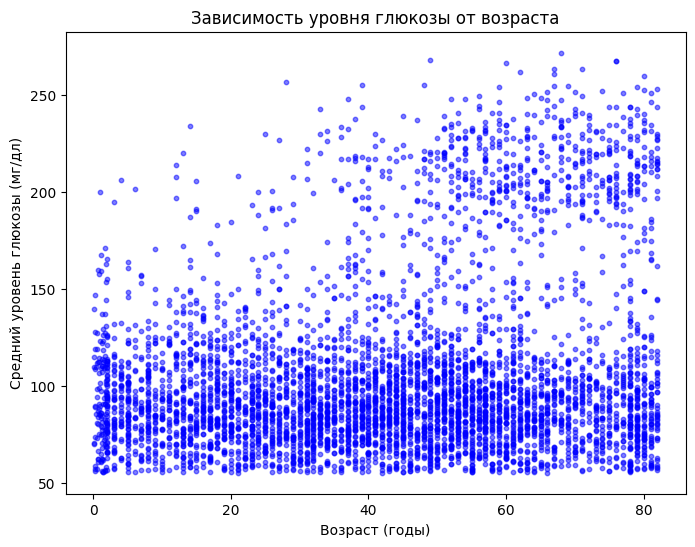

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['avg_glucose_level'], s=10, c='blue', alpha=0.5)
plt.xlabel('Возраст (годы)')
plt.ylabel('Средний уровень глюкозы (мг/дл)')
plt.title('Зависимость уровня глюкозы от возраста')
plt.show()

Можно сделать вывод, что в основном уровень глюкозы у подавляющего числа людей либо в пределах нормы, либо чуть выше, но также есть люди, у которых уровень глюкозы в крови зашкаливает.

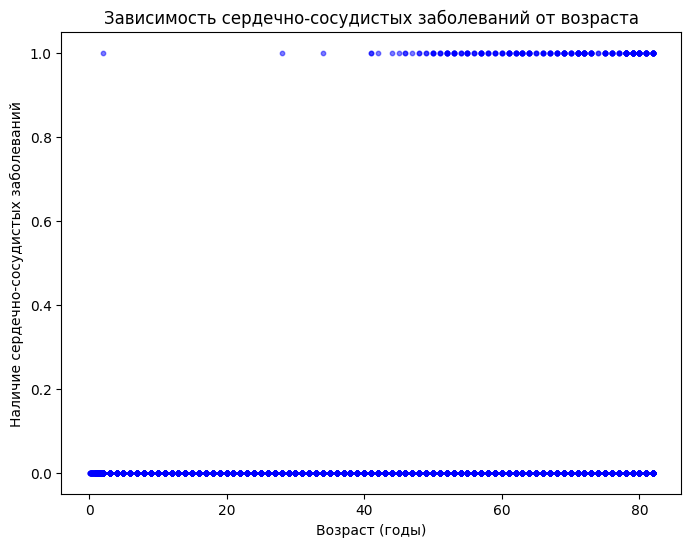

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['heart_disease'], s=10, c='blue', alpha=0.5)
plt.xlabel('Возраст (годы)')
plt.ylabel('Наличие сердечно-сосудистых заболеваний')
plt.title('Зависимость сердечно-сосудистых заболеваний от возраста')
plt.show()

В основном сердечно-сосудистыми заболеваниями страдают люди, возраст которых больше 40 лет. Но также есть люди, у которых эти заболевания проявились в более раннем возрасте.

Ящик с усами - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами:


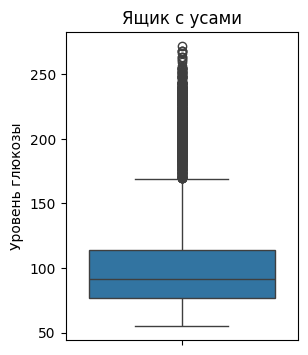

In [27]:
import seaborn as sns

plt.figure(figsize=(3, 4))
sns.boxplot(y="avg_glucose_level", data = data)
plt.title('Ящик с усами')
plt.ylabel('Уровень глюкозы')
plt.show()
pass

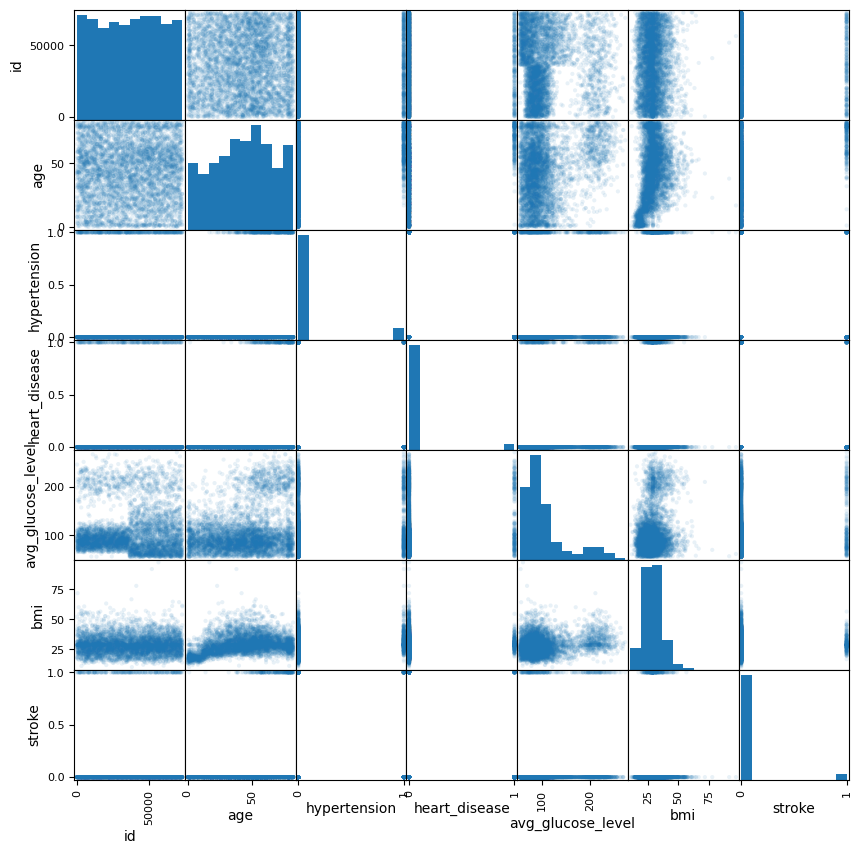

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .1, figsize = (10, 10))
pass

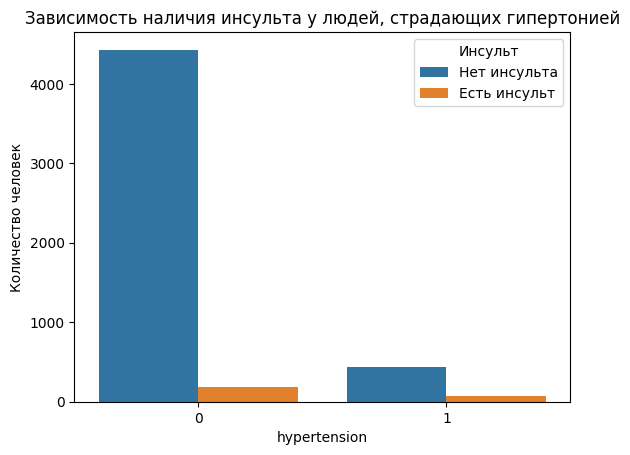

In [29]:
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title('Зависимость наличия инсульта у людей, страдающих гипертонией')
plt.ylabel('Наличие инсульта')
plt.ylabel('Количество человек')
plt.legend(title='Инсульт', labels=['Нет инсульта', 'Есть инсульт'], loc='upper right')
pass

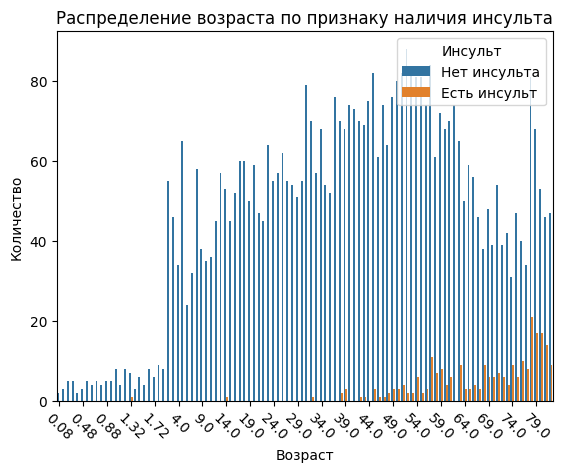

In [32]:
sns.countplot(x='age', hue='stroke', data=data)
plt.title('Распределение возраста по признаку наличия инсульта')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Stroke')
plt.xticks(ticks=plt.xticks()[0][::5], rotation=-45)
plt.legend(title='Инсульт', labels=['Нет инсульта', 'Есть инсульт'], loc='upper right')
plt.show()